# Instruction (Read this)
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- But remove <b>unnecessary</b> cells to ensure the notebook is readable.
- Marks will be <b>deducted</b> if the notebook is cluttered or difficult to follow due to excess or irrelevant content.
- <b>Briefly</b> describe the steps in the "Description:" field.
- <b>Do not</b> submit the dataset. 
- The submitted jupyter notebook will be executed using the uploaded dataset in eLearn.

# Group Information

Group No: Cancer2

- Member 1:MUHAMMAD DANISH AIMAN BIN MUHAMMAD NAZIR
- Member 2:MUHAMMAD AMMAR BIN ADNAN
- Member 3:ARDY QAWI BIN HASHIM
- Member 4:MAHDIL ASHRONIE BIN MUHAMAD MURTADZA


# Import libraries

In [1]:
# !pip install tensorflow
# !pip install deap

In [2]:
# Disable jedi for autocompletion in IPython
%config Completer.use_jedi=False  # comment if not needed

import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from deap import base, creator, tools, algorithms
import random

# Filter warnings
warnings.filterwarnings('ignore')


# Load the dataset

In [3]:
df = pd.read_csv('risk_factors.csv', na_values='?')

In [4]:
print("Dataframe shape: ", df.shape)

Dataframe shape:  (858, 36)


In [5]:
print("Dataframe first 10 rows: ")
df.head(10)

Dataframe first 10 rows: 


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [7]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split the dataset
Split the dataset into training, validation and test sets.

In [8]:
target = df[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
X = df.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1)

In [9]:
# get number of row that has value of at least 1 among the 4 target
collective_target = (target.sum(axis=1) > 0).astype(int)

# Count the positive (1) and negative (0) values
positive_count = collective_target.sum()
negative_count = len(collective_target) - positive_count

# assign the newly formed binary target as y
df['target'] = collective_target
y = df[['target']]

print(f"{positive_count, negative_count}")

(102, 756)


#### Since we detected that the data set is hugely imbalanced in the positive and negative value. We decied to split the dataset using stratify method which will preserve the weight of positive and negative value within the test and train dataset.

In [10]:
seed_num = 42 # initialize seed number

X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Dropping the column that has too many missing value
X = X.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=seed_num) # random_state is set to a value for reproducible output.

# Create a second stratify key for futher spliting of the dataset
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=seed_num)

print("Dataset Shape:")
print(f"Training: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")


train_count = (y_train.sum(axis=1) > 0).astype(int)
val_count = (y_val.sum(axis=1) > 0).astype(int)
test_count = (y_test.sum(axis=1) > 0).astype(int)
print("\nDataset Positive/Negative count:")
print(f"Training: {train_count.sum()}/{len(train_count) - train_count.sum()}")
print(f"Validation: {val_count.sum()}/{len(val_count) - val_count.sum()}")
print(f"Test: {test_count.sum()}/{len(test_count) - test_count.sum()}")

Dataset Shape:
Training: (1058, 30)
Validation: (151, 30)
Test: (303, 30)

Dataset Positive/Negative count:
Training: 517/541
Validation: 73/78
Test: 166/137


# Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description: The clean_dataset function preprocesses a dataset by converting specified boolean-like columns to numeric data types, replacing non-zero values with 1, and imputing missing values using the most frequent value in each column. The function first converts a predefined list of columns to numeric, handling non-convertible values by coercing them to NaN. It then replaces all non-zero values in these columns with 1, maintaining the NaN values. For each column in the dataset, the function checks for missing values and fills them using a SimpleImputer with the 'most frequent' strategy. This preprocessing is applied consistently across the training, validation, and test datasets to ensure uniformity.

In [11]:
X_train.shape

(1058, 30)

In [12]:
X_train.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [13]:
X_train.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
1507,16,2.806314,14.596843,1.000000,0.403157,0.403157,0.040316,0.403157,0.032253,0.000000,...,0.00000,0.0,0.000000,0.00000,0.00000,0,0,0,0,0
1198,15,3.826626,14.000000,1.000000,1.000000,1.046286,0.171638,0.937817,0.457334,0.019420,...,0.00023,0.0,0.004144,0.00023,0.00046,0,0,0,0,0
694,28,2.000000,15.000000,2.275561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.00000,0.00000,0,0,0,0,0
1414,25,3.347254,15.347254,2.527125,0.000000,0.000000,0.000000,1.000000,0.562660,0.420369,...,0.00000,0.0,0.000000,0.00000,0.00000,0,0,0,0,0
1188,43,2.356097,17.287807,3.385933,0.356097,1.780484,0.890242,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.00000,0.00000,0,0,0,0,0


In [14]:
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,26.793951,2.480513,16.901917,2.284710,0.169282,1.408394,0.420191,0.649815,2.529726,0.126737,...,0.001074,0.0,0.042167,0.000129,0.002149,0.082231,0.012287,0.008507,0.013233,0.017958
std,8.721654,1.480414,2.578722,1.335199,0.357758,4.358783,1.950323,0.430082,4.092206,0.299803,...,0.030742,0.0,0.178645,0.000380,0.043453,0.301127,0.110217,0.091882,0.114323,0.132863
min,14.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.848745,15.000000,1.000000,0.000000,0.000000,0.000000,0.023485,0.008043,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.656373,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.051154,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,0.0,1.000000,0.001328,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
print(X_train.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [16]:
# Function to clean, drop column
def clean_dataset(df):
    # Convert boolean-like columns to proper boolean data types
    boolean_cols = [
        'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'IUD',
        'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
        'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
        'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx'
    ]

    # Convert boolean-like columns to numeric
    df[boolean_cols] = df[boolean_cols].apply(pd.to_numeric, errors='coerce')

    # Replace values greater than 0 with 1, leave missing values untouched
    df[boolean_cols] = df[boolean_cols].applymap(lambda x: 1 if x > 0 else x)

    # Loop through columns and fill missing values with mode
    for column in df.columns:
        if df[column].isnull().any():  # Check if column has null values
            imputer = SimpleImputer(strategy='most_frequent')
            df[column] = imputer.fit_transform(df[[column]])
            
    return df

In [17]:
# Clean the dataset
X_train = clean_dataset(X_train)
# performing the same data preprocessing to the validation and test dataset
X_val = clean_dataset(X_val)
X_test = clean_dataset(X_test)

# Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description: A RandomForestClassifier is instantiated with 100 estimators and a random state for reproducibility. The classifier is trained using the training dataset (X_train, y_train). Feature importances are extracted from the trained model and sorted in descending order. Based on the importance rankings, the top five features ('Age', 'Hormonal Contraceptives (years)', 'First sexual intercourse', 'Num of pregnancies', and 'Number of sexual partners') are selected for subsequent analysis. These selected features are then used to create new training, validation, and test datasets. Finally, to address potential outliers and ensure consistency, the features are standardized using StandardScaler, transforming the values in the training, validation, and test sets.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest classifier
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Create a list of tuples (feature, importance) and sort by importance in descending order
sorted_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Hormonal Contraceptives (years): 0.16142448428983383
Age: 0.15446996481217584
First sexual intercourse: 0.1527423983094706
Number of sexual partners: 0.1521370687894019
Num of pregnancies: 0.12155874023899119
IUD (years): 0.05316145861480619
STDs (number): 0.04725033873043477
Hormonal Contraceptives: 0.022782228162088546
IUD: 0.014965114435684046
STDs: 0.013564540224540528
Smokes (years): 0.013016913269361947
Smokes: 0.012773368188314203
Smokes (packs/year): 0.012686887158236588
STDs:HIV: 0.009019925229205196
STDs: Number of diagnosis: 0.008780648431261013
STDs:vulvo-perineal condylomatosis: 0.006945184590090148
STDs:syphilis: 0.006888829996407041
STDs:condylomatosis: 0.006862220234160634
STDs:HPV: 0.004774593043263718
STDs:genital herpes: 0.004105680721008401
STDs:pelvic inflammatory disease: 0.004031438616624279
STDs:vaginal condylomatosis: 0.0031422094919672195
Dx: 0.002879782385567235
STDs:molluscum contagiosum: 0.002487029492352417
Dx:Cancer: 0.002028002658937554
Dx:HPV: 0.0018765

From the random forest feature selection, we will select the top 5 features with highest importance which are:

* Hormonal Contraceptives (years)
  
* Age
  
* First sexual intercourse
  
* Number of sexual partners
  
* Num of pregnancies

In [19]:
# create a dataframe with the selected feature
X_train = X_train[['Age', 'Hormonal Contraceptives (years)', 'First sexual intercourse', 'Num of pregnancies', 'Number of sexual partners']]
X_val = X_val[['Age', 'Hormonal Contraceptives (years)', 'First sexual intercourse', 'Num of pregnancies', 'Number of sexual partners']]
X_test = X_test[['Age', 'Hormonal Contraceptives (years)', 'First sexual intercourse', 'Num of pregnancies', 'Number of sexual partners']]

X_train.head()

# standardized the value to accomodate outlier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Neural Network or Fuzzy Logic System.
______________________________________________________________________________________
Description: 
### Feed Forward Neural Network
The process begins with computing class weights to address class imbalance in the target variable y_train. The create_model function is defined to construct a sequential neural network with specified hyperparameters, including input dimension, learning rate, dropout rate, number of hidden layers, and units per layer.

A grid search is performed over various combinations of hyperparameters: different learning rates, dropout rates, batch sizes, numbers of hidden layers, and units per layer configurations. For each combination, the model is trained for 20 epochs, and the validation accuracy is recorded. The best combination of hyperparameters, which yields the highest validation accuracy, is tracked and stored.

After identifying the best hyperparameters, a final model is created using these parameters. This model is then trained with early stopping to avoid overfitting, where training is halted if the validation loss does not improve for 10 consecutive epochs. The training process includes the use of class weights to further mitigate the impact of class imbalance.

### Evolutionary Neural Network System
The process demonstrates the application of evolutionary algorithms to optimize the hyperparameters of a neural network model, using the DEAP (Distributed Evolutionary Algorithms in Python) library. Initially, the create_model function defines a neural network with two hidden layers, where the number of neurons in each layer and the learning rate are specified. The model is compiled with the Adam optimizer and trained using binary cross-entropy loss. This setup ensures the neural network is ready for optimization.

The optimization process involves defining an evaluation function that trains and evaluates the model based on a given set of hyperparameters. This function takes five hyperparameters as input: the number of epochs, batch size, neurons in the first and second hidden layers, and the learning rate. The model is trained on the training dataset and evaluated on the test dataset, with the test set accuracy serving as the fitness score for the evolutionary algorithm.

DEAP is configured to manage the evolutionary process. A population of individuals, each representing a unique set of hyperparameters, is initialized. Various random attribute generators are defined to create these individuals, and evolutionary operations such as selection, crossover, and mutation are applied. Over five generations, the algorithm evolves the population to maximize the fitness score, with statistics tracking the progress and performance of the population.

After completing the evolutionary process, the best-performing individual, which represents the optimal hyperparameters, is selected. A final model is then created and trained using these optimal parameters on the training dataset and validated on the validation dataset. This approach leverages evolutionary strategies to systematically explore and optimize the hyperparameter space, aiming to enhance the model's performance and generalization capabilities.

## Feedforward Neural Network

#### Performing Grid Search to find the best combination of hyperparameters

In [20]:
# Calculate class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train.values.flatten())
class_weights_dict = dict(enumerate(class_weights))

# Define the model creation function
def create_model(input_dim, learning_rate, dropout_rate, hidden_layers, units_per_layer):
    model = Sequential()
    model.add(Dense(units_per_layer[0], input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for units in units_per_layer[1:hidden_layers]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


#===========================================
#        Adjust Parameter Here             |
#===========================================

learning_rates = [0.1, 0.01, 0.001, 0.0001]
dropout_rates = [0.1, 0.2, 0.3]
batch_sizes = [32, 64, 128]
hidden_layers = [1, 2, 3]
units_per_layer = [[64, 32, 16]]




input_dim = X_train.shape[1]

# Keep track of the best parameters
best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for dr in dropout_rates:
        for bs in batch_sizes:
            for hl in hidden_layers:
                for upl in units_per_layer:
                    if len(upl) >= hl:  # Ensure the units configuration matches the number of hidden layers
                        print(f"Training with learning rate={lr}, dropout rate={dr}, batch size={bs}, hidden layers={hl}, units per layer={upl[:hl]}")
                        model = create_model(input_dim, lr, dr, hl, upl)
                        history = model.fit(X_train, y_train.values, epochs=20, batch_size=bs, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)
                        val_accuracy = max(history.history['val_accuracy'])
                        print(f"Validation accuracy: {val_accuracy}")
                        print("=========================================")

                        if val_accuracy > best_accuracy:
                            best_accuracy = val_accuracy
                            best_params = {
                                'learning_rate': lr,
                                'dropout_rate': dr,
                                'batch_size': bs,
                                'hidden_layers': hl,
                                'units_per_layer': upl[:hl]
                            }

print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")

Training with learning rate=0.1, dropout rate=0.1, batch size=32, hidden layers=1, units per layer=[64]
Validation accuracy: 0.5894039869308472
Training with learning rate=0.1, dropout rate=0.1, batch size=32, hidden layers=2, units per layer=[64, 32]
Validation accuracy: 0.5298013091087341
Training with learning rate=0.1, dropout rate=0.1, batch size=32, hidden layers=3, units per layer=[64, 32, 16]
Validation accuracy: 0.5165562629699707
Training with learning rate=0.1, dropout rate=0.1, batch size=64, hidden layers=1, units per layer=[64]
Validation accuracy: 0.6291390657424927
Training with learning rate=0.1, dropout rate=0.1, batch size=64, hidden layers=2, units per layer=[64, 32]
Validation accuracy: 0.5960264801979065
Training with learning rate=0.1, dropout rate=0.1, batch size=64, hidden layers=3, units per layer=[64, 32, 16]
Validation accuracy: 0.5165562629699707
Training with learning rate=0.1, dropout rate=0.1, batch size=128, hidden layers=1, units per layer=[64]
Validat

#### Creating the model using the best hyperparameter combination with early stopping

In [21]:

# Define the model creation function
def create_model_feedforward(input_dim, learning_rate, dropout_rate, hidden_layers, units_per_layer):
    model = Sequential()
    model.add(Dense(units_per_layer[0], input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    for units in units_per_layer[1:hidden_layers]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Best parameters
best_lr = best_params['learning_rate']
best_dr = best_params['dropout_rate']
best_bs = best_params['batch_size']
best_hl = best_params['hidden_layers']
best_upl = best_params['units_per_layer']

# Create the model
model_feedforward = create_model_feedforward(input_dim, best_lr, best_dr, best_hl, best_upl)

# Define early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model_feedforward.fit(X_train, y_train.values, epochs=200, batch_size=best_bs, 
                    validation_data=(X_val, y_val), callbacks=[early_stopping], class_weight=class_weights_dict)

# Evaluate the model
loss, accuracy = model_feedforward.evaluate(X_test, y_test.values)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")



Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5007 - loss: 0.6979 - val_accuracy: 0.4834 - val_loss: 0.6997
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5729 - loss: 0.6722 - val_accuracy: 0.5298 - val_loss: 0.7180
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 0.6383 - val_accuracy: 0.5364 - val_loss: 0.6923
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6302 - loss: 0.6266 - val_accuracy: 0.5563 - val_loss: 0.7317
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6125 - loss: 0.6612 - val_accuracy: 0.5232 - val_loss: 0.7305
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.6096 - val_accuracy: 0.6159 - val_loss: 0.6871
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.6180 - val_accuracy: 0.6159 - val_loss: 0.6577
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6700 - loss: 0.6027 - val_accuracy: 0.5563 - 

#### Visualizing the training and validation performance

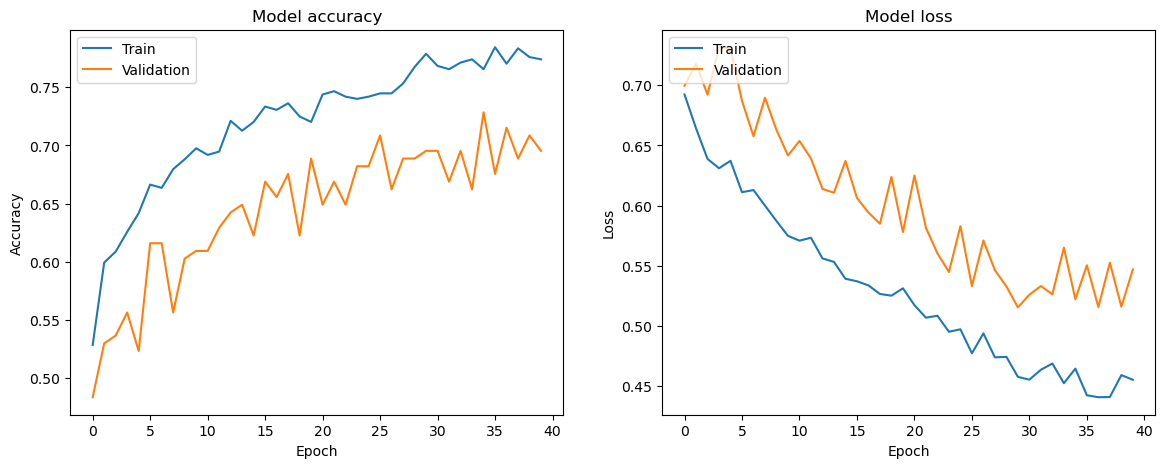

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Evolutionary Neural Network System

#### Defining neural network model

In [23]:
# Define the neural network model
def create_model(input_shape, neurons_layer1=64, neurons_layer2=32, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons_layer1, input_shape=(input_shape,), activation='relu'))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

#### Defining evaluation function for the evolutionary algorithm

In [24]:
# Define the evaluation function for the evolutionary algorithm
def evaluate(individual):
    epochs, batch_size, neurons_layer1, neurons_layer2, learning_rate = individual
    input_shape = X_train.shape[1]
    model_hybrid = create_model(input_shape, neurons_layer1, neurons_layer2, learning_rate)
    model_hybrid.fit(X_train, y_train.values, epochs=int(epochs), batch_size=int(batch_size), verbose=0, class_weight=class_weights_dict)
    loss, accuracy = model_hybrid.evaluate(X_test, y_test.values, verbose=0)
    return accuracy,

# Set random seed for reproducibility
random.seed(42)

#### Using DEAP (Distributed Evolutionary Algorithms in Python) library to set up and run evolutionary algorithm for optimizing the hyperparameters

In [25]:
# Define individual and population for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_epochs", random.randint, 10, 100)
toolbox.register("attr_batch_size", random.choice, [16, 32, 64, 128, 256])
toolbox.register("attr_neurons_layer1", random.randint, 32, 256)
toolbox.register("attr_neurons_layer2", random.randint, 16, 128)
toolbox.register("attr_learning_rate", random.uniform, 0.0001, 0.1)

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_epochs, toolbox.attr_batch_size, 
                  toolbox.attr_neurons_layer1, toolbox.attr_neurons_layer2,
                  toolbox.attr_learning_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create initial population
population = toolbox.population(n=10)

# Set up the statistics to collect
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the evolutionary algorithm
result_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, 
                                                 stats=stats, halloffame=None, verbose=True)

gen	nevals	avg     	std      	min     	max     
0  	10    	0.658416	0.0853281	0.547855	0.811881
1  	9     	0.676238	0.098607 	0.462046	0.792079
2  	4     	0.761716	0.0423112	0.683168	0.811881
3  	9     	0.756766	0.100669 	0.465347	0.828383
4  	6     	0.805611	0.0232175	0.752475	0.831683
5  	4     	0.813531	0.0149974	0.788779	0.831683


#### Using best parameter to train neural network 

In [26]:
# Extract the best individual
best_individual = tools.selBest(result_population, k=1)[0]
epochs, batch_size, neurons_layer1, neurons_layer2, learning_rate = best_individual

# Train the final model with the best parameters
input_shape = X_train.shape[1]
final_model_hybrid = create_model(input_shape, neurons_layer1, neurons_layer2, learning_rate)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = final_model_hybrid.fit(
    X_train, y_train.values,
    epochs=int(epochs),
    validation_data=(X_val, y_val.values),
    batch_size=int(batch_size),
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)


# Evaluate the model
loss, accuracy = final_model_hybrid.evaluate(X_test, y_test.values)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5657 - loss: 0.6770 - val_accuracy: 0.4901 - val_loss: 0.6978
Epoch 2/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6544 - loss: 0.6348 - val_accuracy: 0.5497 - val_loss: 0.7053
Epoch 3/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6876 - loss: 0.6018 - val_accuracy: 0.5629 - val_loss: 0.6957
Epoch 4/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6818 - loss: 0.6107 - val_accuracy: 0.6159 - val_loss: 0.7008
Epoch 5/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6965 - loss: 0.5790 - val_accuracy: 0.5894 - val_loss: 0.6809
Epoch 6/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6805 - loss: 0.5938 - val_accuracy: 0.5762 - val_loss: 0.7235
Epoch 7/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6940 - loss: 0.5862 - val_accuracy: 0.6159 - val_loss: 0.6630
Epoch 8/79
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7350 - loss: 0.5531 - val_accuracy: 0.6556 - val_loss:

#### Visualizing the training and validation performance

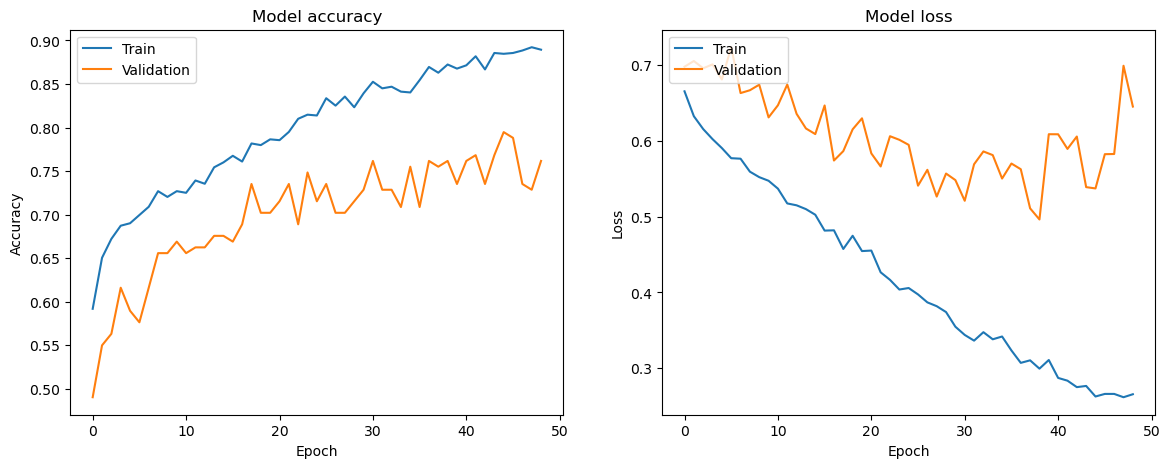

In [27]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description: The  Evolutionary Neural Network System shows overall improved performance compared to the initial model (model_feedforward). It has better accuracy, precision, and F1 score, reflecting improved general performance and better balance between precision and recall. However, it has slightly lower recall, indicating that while it is better at avoiding false positives, it might miss some positive cases. The confusion matrix shows that the final model has made fewer false positive errors and more correct predictions for negative cases, which is a positive outcome.

## Evaluation for Feedforward Neural Network

In [28]:
# Evaluation for Evolutionary Neural Network System
y_pred = (model_feedforward.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")

print("Confusion Matrix:")
print(conf_matrix)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 0.6765676567656765
Test Precision: 0.6752577319587629
Test Recall: 0.7891566265060241
Test F1 Score: 0.7277777777777779
Confusion Matrix:
[[ 74  63]
 [ 35 131]]


## Evaluation for Evolutionary Neural Network System

In [29]:
# Evaluation for Evolutionary Neural Network System
y_pred = (final_model_hybrid.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")

print("Confusion Matrix:")
print(conf_matrix)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Accuracy: 0.7524752475247525
Test Precision: 0.7630057803468208
Test Recall: 0.7951807228915663
Test F1 Score: 0.7787610619469026
Confusion Matrix:
[[ 96  41]
 [ 34 132]]
